In [ ]:
!nvidia-smi

Sun Nov  1 03:11:16 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    24W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* @file 深度學習基礎/3_non_linear_function.ipynb
  * @brief 3_non_linear_function

  * 此份程式碼是以教學為目的，附有完整的架構解說。

  * @author 人工智慧科技基金會 AI 工程師 - 康文瑋
  * Email: run963741@aif.tw
  * Resume: https://www.cakeresume.com/run963741

  * 最後更新日期: 2020/11/26

# 載入函數

In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

os.chdir('/content/drive/Shared drives/類技術班教材/標準版/ 深度學習基礎/DL_part1')

# Quadratic Polynomial (一元二次方程式)

通常在現實世界的資料中，我們只會拿到資料，也就是函數的輸入 $X$ 以及函數的輸出 $y$，不可能會知道 $X$ 和 $y$ 之間的函數 $f(x)$ 長什麼樣子，接下來讓我們來嘗試知道 $f(x)$ 與不知道 $f(x)$ 的情形會是什麼：

模擬更複雜的一元二次方程式

$$
f(x) = 6x^2-4x+1
$$

# 假設我們知道函數 $f(x)$ 真實的樣子：

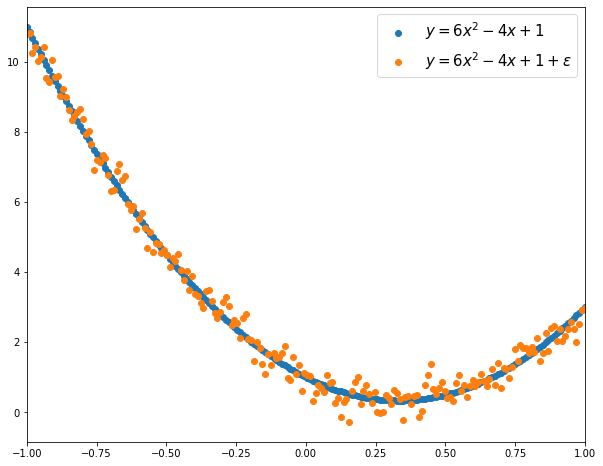

In [ ]:
# 準備資料
x = np.linspace(-1, 1, 200)
# 這邊另外製作一個特徵 x ** 2，這是因為我們已經知道函數真正的樣子 f(x)=6x^2-4x+1 才能夠這樣做
x_in = np.stack([x ** 2, x], axis=1)

# 設定 w1=6, w2=-4, b=1，是模型學習參數的最終目標
y_true = 6 * x_in[:,0] - 4 * x_in[:,1] + 1

# 加上 noise，模擬在真實世界抽樣的結果
noise = np.random.normal(0, 0.3, size=len(x_in))
y_noise = y_true + noise

# 資料視覺化
plt.figure(figsize=(10, 8))
plt.scatter(x_in[:,1], y_true, label = '$y = 6x^2 -4x + 1$')
plt.scatter(x_in[:,1], y_noise, label = '$y = 6x^2 -4x + 1 + \epsilon $')
plt.legend(fontsize=15)
plt.axis(xmin=-1, xmax=1)
plt.show()

In [ ]:
print('x_in_shape:', x_in.shape)
print('y_true_shape:', y_true.shape)
print('y_noise_shape:', y_noise.shape)

x_in_shape: (200, 2)
y_true_shape: (200,)
y_noise_shape: (200,)


## 建立模型

接下來使用 Functional API 的方式建立模型。

In [ ]:
# 建構模型
input = tf.keras.layers.Input(shape=(2,), name='Input_layer')
dense = tf.keras.layers.Dense(1, use_bias=True, activation='linear', name='dense1', kernel_initializer='glorot_uniform')

output = dense(input)

model = tf.keras.Model(input, output, name='polynomial_function')

model.summary()

Model: "polynomial_function"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     [(None, 2)]               0         
_________________________________________________________________
dense1 (Dense)               (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## 訓練模型

Tensorflow 最常使用來編譯模型的方式是透過 `.compile` 來指定損失函數 (loss function) 、優化器 (optimizer)、評估指標 (metrics) 以及 callbacks。

迴歸任務參數：
* `loss`: 損失函數常常使用 `mean_squared_error`, `mean_absolute_error`。
* `optimizer`: 優化器決定參數更新的方式，目前最常使用的優化器為 `SGD, RMSprop, Adam`，近期研究也有新的優化器，例如 `RangerLars`。

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=1e-2)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [ ]:
# 訓練模型
model.fit(x_in, y_noise, epochs=300)  # 一個 epoch 會看過一次所有的資料

Epoch 1/300
7/7 [==============================] - 0s 2ms/step - loss: 21.2970
Epoch 2/300
7/7 [==============================] - 0s 2ms/step - loss: 17.5436
Epoch 3/300
7/7 [==============================] - 0s 2ms/step - loss: 14.8908
Epoch 4/300
7/7 [==============================] - 0s 2ms/step - loss: 12.6378
Epoch 5/300
7/7 [==============================] - 0s 2ms/step - loss: 11.0178
Epoch 6/300
7/7 [==============================] - 0s 2ms/step - loss: 9.5748
Epoch 7/300
7/7 [==============================] - 0s 2ms/step - loss: 8.3898
Epoch 8/300
7/7 [==============================] - 0s 2ms/step - loss: 7.4134
Epoch 9/300
7/7 [==============================] - 0s 2ms/step - loss: 6.6381
Epoch 10/300
7/7 [==============================] - 0s 2ms/step - loss: 6.0743
Epoch 11/300
7/7 [==============================] - 0s 2ms/step - loss: 5.6248
Epoch 12/300
7/7 [==============================] - 0s 2ms/step - loss: 5.1695
Epoch 13/300
7/7 [==============================] - 0s 2

### 查看訓練參數

使用 `.get_weights()` 可以拿取模型所有的參數

In [ ]:
w1_pred = model.get_weights()[0][0]
w2_pred = model.get_weights()[0][1]
b_pred = model.get_weights()[1]

print('w1_true:', 6, '\nw2_true:', -4,'\nb_true:', 1)
print('-'*10)
print('w1_pred:', w1_pred, '\nw2_pred:', w2_pred, '\nb_pred:', b_pred)

w1_true: 6 
w2_true: -4 
b_true: 1
----------
w1_pred: [5.74325] 
w2_pred: [-4.02006] 
b_pred: [1.1074178]


In [ ]:
# 模型預測
y_pred = model.predict(x_in)

### 視覺化結果


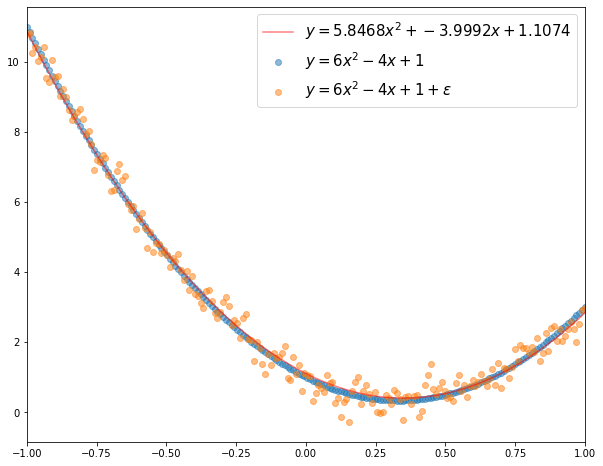

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(x_in[:,1], y_true, label = '$y = 6x^2 -4x + 1$', alpha=0.5)
plt.scatter(x_in[:,1], y_noise, label = '$y = 6x^2 -4x + 1 + \epsilon $', alpha=0.5)
plt.plot(x_in[:,1], y_pred, 'r', label = '$ y = %1.4fx^2 + %1.4fx + %1.4f $' % (W_pred[0], W_pred[1], b_pred[0]), alpha=0.5)
plt.legend(fontsize=15)
plt.axis(xmin=-1, xmax=1)
plt.show()

# 假設我們不知道函數 $f(x)$ 真實的樣子：

假設我們不曉得函數真正的樣子，這裏就沒辦法像上面做特徵工程 $x^2$，就只能先從模型架構下手

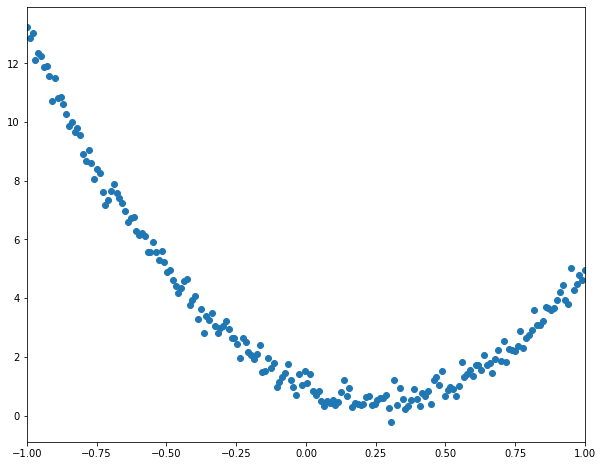

In [ ]:
# 準備資料
x_in = np.linspace(-1, 1, 200)

# 設定 w1=8, w2=-2, b=3，是模型學習參數的最終目標
y_true = 8 * x_in**2 - 4 * x_in + 1

# 加上 noise，模擬在真實世界抽樣的結果
noise = np.random.normal(0, 0.3, size=len(x_in))
y_noise = y_true + noise

# 資料視覺化
plt.figure(figsize=(10, 8))
plt.scatter(x_in, y_noise)
plt.axis(xmin=-1, xmax=1)
plt.show()

In [ ]:
print('x_in_shape:', x_in.shape)
print('y_noise_shape:', y_noise.shape)

x_in_shape: (200,)
y_noise_shape: (200,)


## 建立模型

假設只知道資料 $X$ 和標籤 $y$，而且通常資料會是非線性的，所以通常會在模型中加入激發函數 $activation\;function$ 來讓模型有學習非線性曲線的能力。

常見的激發函數有以下幾種：

<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1HwbxwZIiWapLOIZ3DhZr1O18H2uBXW58' width="700"/>
<figcaption>Activation function</figcaption></center>
</figure>

In [ ]:
# def mish(x):
# 	return tf.keras.layers.Lambda(lambda x: x*tf.tanh(tf.math.log(1+tf.math.exp(x))))(x)

In [ ]:
# 與上面模擬一元二次方程式的模型比較，兩者差別
input = tf.keras.layers.Input(shape=(1,), name='Input_layer')
dense1 = tf.keras.layers.Dense(8, use_bias=True, activation='tanh', name='dense1', kernel_initializer='glorot_uniform')
dense2 = tf.keras.layers.Dense(12, use_bias=True, activation='tanh', name='dense2', kernel_initializer='glorot_uniform')
dense3 = tf.keras.layers.Dense(1, use_bias=True, activation='linear', name='dense3', kernel_initializer='glorot_uniform')

dense_output1 = dense1(input)
dense_output2 = dense2(dense_output1)
output = dense3(dense_output2)

model = tf.keras.Model(input, output, name='polynomial_function')

model.summary()

Model: "polynomial_function"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     [(None, 1)]               0         
_________________________________________________________________
dense1 (Dense)               (None, 8)                 16        
_________________________________________________________________
dense2 (Dense)               (None, 12)                108       
_________________________________________________________________
dense3 (Dense)               (None, 1)                 13        
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


## 訓練模型

Tensorflow 最常使用來編譯模型的方式是透過 `.compile` 來指定損失函數 (loss function) 、優化器 (optimizer)、評估指標 (metrics) 以及 callbacks。

迴歸任務參數：
* `loss`: 損失函數常常使用 `mean_squared_error`, `mean_absolute_error`。
* `optimizer`: 優化器決定參數更新的方式，目前最常使用的優化器為 `SGD, RMSprop, Adam`，近期研究也有新的優化器，例如 `RangerLars`。

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=1e-2)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [ ]:
# 訓練模型
model.fit(x_in, y_noise, epochs=300)  # 一個 epoch 會看過一次所有的資料

Epoch 1/300
7/7 [==============================] - 0s 2ms/step - loss: 19.0451
Epoch 2/300
7/7 [==============================] - 0s 2ms/step - loss: 11.6772
Epoch 3/300
7/7 [==============================] - 0s 3ms/step - loss: 8.9374
Epoch 4/300
7/7 [==============================] - 0s 2ms/step - loss: 8.1986
Epoch 5/300
7/7 [==============================] - 0s 2ms/step - loss: 7.7568
Epoch 6/300
7/7 [==============================] - 0s 2ms/step - loss: 7.4639
Epoch 7/300
7/7 [==============================] - 0s 2ms/step - loss: 7.1095
Epoch 8/300
7/7 [==============================] - 0s 2ms/step - loss: 6.7502
Epoch 9/300
7/7 [==============================] - 0s 2ms/step - loss: 6.4322
Epoch 10/300
7/7 [==============================] - 0s 2ms/step - loss: 6.1215
Epoch 11/300
7/7 [==============================] - 0s 2ms/step - loss: 5.7103
Epoch 12/300
7/7 [==============================] - 0s 2ms/step - loss: 5.2384
Epoch 13/300
7/7 [==============================] - 0s 2ms/

In [ ]:
# 模型預測
y_pred = model.predict(x_in)

### 視覺化結果


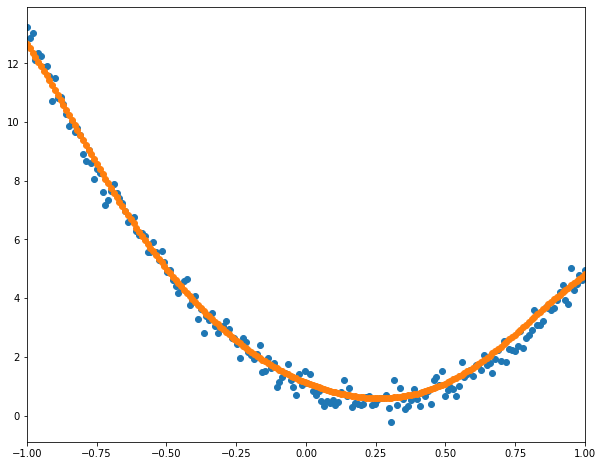

In [ ]:
# 資料視覺化
plt.figure(figsize=(10, 8))
plt.scatter(x_in, y_noise)
plt.scatter(x_in, y_pred)
plt.axis(xmin=-1, xmax=1)
plt.show()

# 動手試試看

請使用下面的資料集 `3_non_linear_train.csv` 訓練出一個迴歸模型。

In [ ]:
import pandas as pd

data = pd.read_csv('Data/3_non_linear_train.csv')
print(data.shape)
data.head()

(200, 2)


,x,y
0,-4.341593,1.403286
1,-4.297456,1.016483
2,-4.253319,1.169736
3,-4.209183,0.701714
4,-4.165046,0.676517


In [ ]:
x_in =  # 將 x 從資料中挑出來
y_noise =  # 將 y 從資料中挑出來

# 資料視覺化
plt.figure(figsize=(10, 8))
plt.scatter(x_in, y_noise)
plt.show()

## 建立模型


In [ ]:
input = tf.keras.layers.Input(shape=(1,), name='Input_layer')
dense = 

output = 

model = tf.keras.Model(input, output, name='polynomial_function')

model.summary()

## 訓練模型

* `loss` 請使用 `mean_squared_error`
* `optimzier` 請使用 `sgd`

In [ ]:
sgd = 
model.compile(loss=, optimizer=)

請輸入訓練資料集。

In [ ]:
# 訓練模型
model.fit(, , epochs=300)  # 一個 epoch 會看過一次所有的資料

請將 `x_in` 拿來預測。

In [ ]:
# 模型預測
y_pred = model.predict()

### 視覺化結果


In [ ]:
# 資料視覺化
plt.figure(figsize=(10, 8))
plt.scatter(x_in, y_noise)
plt.scatter(x_in, y_pred)
plt.show()